In [4]:

import numpy as np
import pandas as pd

#import matplotlib for plotting
import matplotlib.pyplot as plt

# Import the seaborn, commonly used alias for seaborn is sns
import seaborn as sns


In [17]:
#Loading "Uber Request Data" into dataframe
df = pd.read_csv(r"UberRequestData.csv")
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


###  Data Cleaning and Preparation of "Uber Request Data"


In [18]:
# Ensuring  that the dates and time are in the proper format and   
# Deriving new columns which will be useful for analysis :
# by splitting up Request/Drop 'timestamp' into two seperate columns 
# 'Date'  and Time' 

# Splitting up 'Request timestamp' into new seperate columns 'Request Date'
# and 'Request Time'
df['Request Date'] = pd.to_datetime(df['Request timestamp']).dt.date
df['Request Time'] = pd.to_datetime(df['Request timestamp']).dt.time

#extract the "hour" as a seperate column for the ease of  analysis 
#by Creating  the two slots "Morning Hours" and "Evening Hours"
df['Requesting hour'] = pd.to_datetime(df['Request timestamp']).dt.hour

# Splitting up 'Drop timestamp' into new speerate columns 'Drop Date'
# and 'Drop Time'
df['Drop Date'] = pd.to_datetime(df['Drop timestamp']).dt.date
df['Drop Time'] = pd.to_datetime(df['Drop timestamp']).dt.time

# Dropping the two Columns  from dataframe : the 'Request timestamp'
# and  'Drop timestamp' since the same data already copied  
# into newly created columns 'Request Date','Request Time' 
# and 'Drop Date', 'Drop Time' respectively

df.drop(columns=['Request timestamp', 'Drop timestamp'], inplace=True)

# Dropping columuns   'Drop Date' and  'Drop Time' since it has does not
# have much role in our analysis
#
df.drop(columns=['Drop Date', 'Drop Time'], inplace=True)
df


,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Requesting hour
0,619,Airport,1.0,Trip Completed,2016-11-07,11:51:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07,17:57:00,17
2,1807,City,1.0,Trip Completed,2016-12-07,09:17:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07,21:08:00,21
4,3112,City,1.0,Trip Completed,2016-07-13,08:33:16,8
5,3879,Airport,1.0,Trip Completed,2016-07-13,21:57:28,21
6,4270,Airport,1.0,Trip Completed,2016-07-14,06:15:32,6
7,5510,Airport,1.0,Trip Completed,2016-07-15,05:11:52,5
8,6248,City,1.0,Trip Completed,2016-07-15,17:57:27,17
9,267,City,2.0,Trip Completed,2016-11-07,06:46:00,6


# Preparing DataSet (Cancelled or No Cars Available) for 'Morning' hours 

In [19]:
#Prepare the dataframe which contains Staus Cancelled or No Cars Available)
df_cancelled_and_nocar = df[df['Status'] != "Trip Completed"]

#Prepare the dataframe which contains Staus Cancelled or No Cars Available)
# in 'Morning' hours 
df_cancelled_and_nocar_morning = df_cancelled_and_nocar[(df_cancelled_and_nocar["Requesting hour"] < 12)]

df_cancelled_and_nocar_morning

,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Requesting hour
2831,2905,City,1.0,Cancelled,2016-07-13,06:08:41,6
2834,5927,City,1.0,Cancelled,2016-07-15,10:12:40,10
2837,4451,City,2.0,Cancelled,2016-07-14,08:38:38,8
2839,80,City,3.0,Cancelled,2016-11-07,04:47:00,4
2840,534,City,3.0,Cancelled,2016-11-07,10:01:00,10
2841,1867,Airport,3.0,Cancelled,2016-12-07,09:59:00,9
2842,4383,City,3.0,Cancelled,2016-07-14,07:48:31,7
2846,4280,City,4.0,Cancelled,2016-07-14,06:33:09,6
2847,4533,City,4.0,Cancelled,2016-07-14,09:31:08,9
2848,3230,City,5.0,Cancelled,2016-07-13,10:01:57,10


#   Below is the Plotting Staus (Cancelled or No Cars Available) in 'Morning' hours : 'Airport to City'

In [8]:
#Prepare the dataframe which contains Staus Cancelled or No Cars Available)
# in 'Morning' hours from 'Airport to City'
df_cancelled_and_nocar_morning_Airport_to_city = df_cancelled_and_nocar_morning[df_cancelled_and_nocar_morning['Pickup point'] == 'Airport']

print("\n'Morning' hours from 'Airport to City'")
df_cancelled_and_nocar_morning_Airport_to_city['Status'].value_counts()


'Morning' hours from 'Airport to City'


No Cars Available    192
Cancelled             39
Name: Status, dtype: int64


'Morning' hours from 'Airport to City'


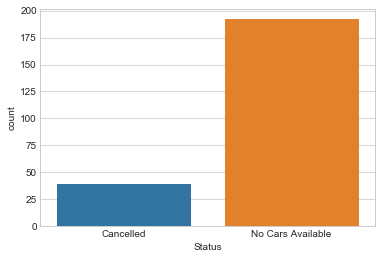

In [9]:

# set a seaborn style of your taste
sns.set_style("whitegrid")

# Plotting Staus (Cancelled or No Cars Available) in "Morning" hours 

# Using 'countplot' to plot  a histogram across of  categorical variable "Status"
# Here 'Status' in X axis reprsents  'Cancelled' or 'No Cars Available'
# and Count in Y axis  represents the Number of Requests from the riders

print("\n'Morning' hours from 'Airport to City'")
ax = sns.countplot(x="Status", data=df_cancelled_and_nocar_morning_Airport_to_city)

# Below is the  Plotting Staus (Cancelled or No Cars Available) in 'Morning' hours : 'City to Airport'

In [10]:

#Prepare the dataframe which contains Staus Cancelled or No Cars Available)
# in 'Morning' hours from 'Airport to City'
df_cancelled_and_nocar_morning_City_to_Airport = df_cancelled_and_nocar_morning[df_cancelled_and_nocar_morning['Pickup point'] == 'City']

print("\n'Morning' hours from  'City to Airport'")
df_cancelled_and_nocar_morning_City_to_Airport['Status'].value_counts()
#df_cancelled_and_nocar_morning_City_to_Airport



'Morning' hours from  'City to Airport'


Cancelled            946
No Cars Available    619
Name: Status, dtype: int64


'Morning' hours from  'City to Airport'


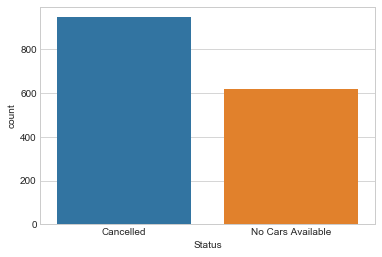

In [11]:

# set a seaborn style of your taste
sns.set_style("whitegrid")

# Plotting Staus (Cancelled or No Cars Available) in "Morning" hours From 
 # 'City to Airport'

#'countplot' to plot  a histogram across of  categorical variable "Status"
#Here 'Status' in X axis reprsents  'Cancelled' or 'No Cars Available'
# and Count in Y axis  represents the Number of Requests from the riders

print("\n'Morning' hours from  'City to Airport'")
ax = sns.countplot(x="Status", data=df_cancelled_and_nocar_morning_City_to_Airport)

# Preparing DataSet (Cancelled or No Cars Available) for 'Evening' hours 

In [20]:
#Prepare the dataframe which contains Staus Cancelled or No Cars Available)
# in 'Evening' hours 

df_cancelled_and_nocar_evening = df_cancelled_and_nocar[(df_cancelled_and_nocar["Requesting hour"] >= 12)]

df_cancelled_and_nocar_evening

,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Requesting hour
2832,4805,City,1.0,Cancelled,2016-07-14,17:07:58,17
2833,5202,Airport,1.0,Cancelled,2016-07-14,20:51:37,20
2835,2347,Airport,2.0,Cancelled,2016-12-07,19:14:00,19
2836,3806,Airport,2.0,Cancelled,2016-07-13,20:57:49,20
2838,5023,Airport,2.0,Cancelled,2016-07-14,19:04:08,19
2843,748,City,4.0,Cancelled,2016-11-07,15:49:00,15
2844,1254,Airport,4.0,Cancelled,2016-11-07,21:53:00,21
2845,3807,Airport,4.0,Cancelled,2016-07-13,20:58:00,20
2855,2582,Airport,7.0,Cancelled,2016-12-07,21:42:00,21
2864,3549,City,9.0,Cancelled,2016-07-13,18:03:30,18


# Below is the Plotting Staus (Cancelled or No Cars Available) in 'Evening' hours : 'Airport to City'

In [13]:
#Prepare the dataframe which contains Staus Cancelled or No Cars Available)
# in 'Morning' hours from 'Airport to City'
df_cancelled_and_nocar_evening_Airport_to_city = df_cancelled_and_nocar_evening[df_cancelled_and_nocar_evening['Pickup point'] == 'Airport']


print("\n'Evening' hours from 'Airport to City'")
df_cancelled_and_nocar_evening_Airport_to_city['Status'].value_counts()
#df_cancelled_and_nocar_evening_Airport_to_city


'Evening' hours from 'Airport to City'


No Cars Available    1521
Cancelled             159
Name: Status, dtype: int64


'Evening' hours from 'Airport to City'


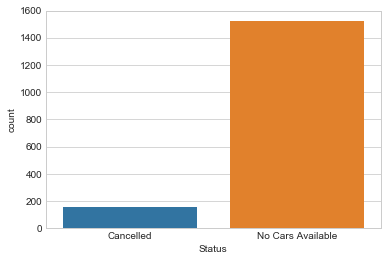

In [14]:
# set a seaborn style of your taste
sns.set_style("whitegrid")

# Plotting Staus (Cancelled or No Cars Available) in "Evening" hours 

# Using 'countplot' to plot  a histogram across of  categorical variable "Status"
# Here 'Status' in X axis reprsents  'Cancelled' or 'No Cars Available'
# and Count in Y axis  represents the Number of Requests from the riders
print("\n'Evening' hours from 'Airport to City'")
ax = sns.countplot(x="Status", data=df_cancelled_and_nocar_evening_Airport_to_city)

# Below is the  Plotting Staus (Cancelled or No Cars Available) in 'Evening' hours : 'City to Airport'

In [22]:
#Prepare the dataframe which contains Staus Cancelled or No Cars Available)
# in 'Morning' hours from 'Airport to City'
df_cancelled_and_nocar_evening_City_to_Airport = df_cancelled_and_nocar_evening[df_cancelled_and_nocar_evening['Pickup point'] == 'City']

print("\n'Evening' hours from 'City to Airport'")
df_cancelled_and_nocar_evening_City_to_Airport['Status'].value_counts()
#df_cancelled_and_nocar_evening_Airport_to_city


'Evening' hours from 'City to Airport'


No Cars Available    318
Cancelled            120
Name: Status, dtype: int64


'Evening' hours from 'City to Airport'


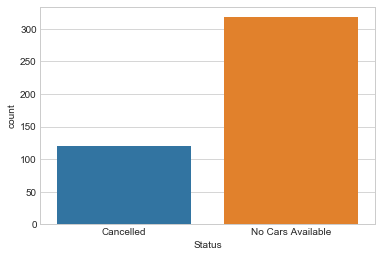

In [23]:
# set a seaborn style of your taste
sns.set_style("whitegrid")

# Plotting Staus (Cancelled or No Cars Available) in "Evening" hours 

# Using 'countplot' to plot  a histogram across of  categorical variable "Status"
# Here 'Status' in X axis reprsents  'Cancelled' or 'No Cars Available'
# and Count in Y axis  represents the Number of Requests from the riders

ax = sns.countplot(x="Status", data=df_cancelled_and_nocar_evening_City_to_Airport)

print("\n'Evening' hours from 'City to Airport'")

#   #From the above Plots it can be analysed and identified the highest and most severe Supply and Demand gap  is in following Time Slots :  
# 'Evening' hours : 'Airport to City'  ( Due to 'No Cars Available')
# 'Morning' hours : 'City  to Airport' (Due to 'High Cancellation')